In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_5degree = pd.read_csv('x_5degree.csv',header=None)

In [5]:
x_5degree = x_5degree.to_numpy(dtype='float32')

In [6]:
x = x_5degree[:, 0:15]

In [7]:
x.shape

(1302, 15)

In [8]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [12]:
tsr = x_5degree[:, -2]

In [13]:
theta = x_5degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(1171, 100, 100)


In [16]:
print(y_test.shape)

(131, 100, 100)


In [17]:
print(x_train.shape)

(1171, 15, 1)


In [18]:
print(x_test.shape)

(131, 15, 1)


In [19]:
theta_train

array([ 600., 1065.,  430., ..., 1045., 1045.,  205.], dtype=float32)

In [20]:
tsr_train

array([2. , 1.6, 1.6, ..., 2. , 1.8, 2. ], dtype=float32)

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
30/30 [==============================] - 1s 5ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 2/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0962
Epoch 3/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0848
Epoch 4/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 5/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0800
Epoch 6/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0770
Epoch 7/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 8/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0743
Epoch 9/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0725
Epoch 10/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 11/10000
30/30 [=======

30/30 [==============================] - 0s 5ms/step - loss: 8.9596e-04 - rmse: 0.0270
Epoch 85/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7735e-04 - rmse: 0.0266
Epoch 86/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6221e-04 - rmse: 0.0264
Epoch 87/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.4906e-04 - rmse: 0.0261
Epoch 88/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.3547e-04 - rmse: 0.0258
Epoch 89/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.1844e-04 - rmse: 0.0255
Epoch 90/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.0249e-04 - rmse: 0.0252
Epoch 91/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9143e-04 - rmse: 0.0250
Epoch 92/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8155e-04 - rmse: 0.0248
Epoch 93/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6862e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 3.6286e-04 - rmse: 0.0141
Epoch 164/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5871e-04 - rmse: 0.0139
Epoch 165/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5551e-04 - rmse: 0.0138
Epoch 166/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5417e-04 - rmse: 0.0138
Epoch 167/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5196e-04 - rmse: 0.0137
Epoch 168/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4968e-04 - rmse: 0.0136
Epoch 169/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4670e-04 - rmse: 0.0135
Epoch 170/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4609e-04 - rmse: 0.0135
Epoch 171/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4288e-04 - rmse: 0.0134
Epoch 172/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4120e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 2.4789e-04 - rmse: 0.0097
Epoch 243/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4572e-04 - rmse: 0.0096
Epoch 244/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4497e-04 - rmse: 0.0096
Epoch 245/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4499e-04 - rmse: 0.0096
Epoch 246/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4386e-04 - rmse: 0.0095
Epoch 247/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4299e-04 - rmse: 0.0095
Epoch 248/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4152e-04 - rmse: 0.0094
Epoch 249/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4136e-04 - rmse: 0.0094
Epoch 250/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3970e-04 - rmse: 0.0094
Epoch 251/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3877e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.9796e-04 - rmse: 0.0076
Epoch 322/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9749e-04 - rmse: 0.0076
Epoch 323/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9724e-04 - rmse: 0.0076
Epoch 324/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9689e-04 - rmse: 0.0076
Epoch 325/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9723e-04 - rmse: 0.0076
Epoch 326/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9587e-04 - rmse: 0.0075
Epoch 327/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9564e-04 - rmse: 0.0075
Epoch 328/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9581e-04 - rmse: 0.0076
Epoch 329/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9501e-04 - rmse: 0.0075
Epoch 330/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9442e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.6947e-04 - rmse: 0.0065
Epoch 401/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6965e-04 - rmse: 0.0066
Epoch 402/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6975e-04 - rmse: 0.0066
Epoch 403/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6868e-04 - rmse: 0.0065
Epoch 404/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6855e-04 - rmse: 0.0065
Epoch 405/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6860e-04 - rmse: 0.0065
Epoch 406/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6782e-04 - rmse: 0.0065
Epoch 407/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6766e-04 - rmse: 0.0065
Epoch 408/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6757e-04 - rmse: 0.0065
Epoch 409/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6751e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.4940e-04 - rmse: 0.0058
Epoch 480/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4965e-04 - rmse: 0.0059
Epoch 481/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4931e-04 - rmse: 0.0058
Epoch 482/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4925e-04 - rmse: 0.0058
Epoch 483/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4904e-04 - rmse: 0.0058
Epoch 484/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4882e-04 - rmse: 0.0058
Epoch 485/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4876e-04 - rmse: 0.0058
Epoch 486/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4819e-04 - rmse: 0.0058
Epoch 487/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4759e-04 - rmse: 0.0058
Epoch 488/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4782e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.3423e-04 - rmse: 0.0053
Epoch 559/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3409e-04 - rmse: 0.0053
Epoch 560/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3413e-04 - rmse: 0.0054
Epoch 561/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3450e-04 - rmse: 0.0054
Epoch 562/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3424e-04 - rmse: 0.0054
Epoch 563/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3367e-04 - rmse: 0.0054
Epoch 564/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3396e-04 - rmse: 0.0054
Epoch 565/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3387e-04 - rmse: 0.0054
Epoch 566/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3358e-04 - rmse: 0.0054
Epoch 567/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3305e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.2285e-04 - rmse: 0.0051
Epoch 638/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2226e-04 - rmse: 0.0050
Epoch 639/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2227e-04 - rmse: 0.0050
Epoch 640/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2203e-04 - rmse: 0.0050
Epoch 641/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2192e-04 - rmse: 0.0050
Epoch 642/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2188e-04 - rmse: 0.0050
Epoch 643/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2228e-04 - rmse: 0.0051
Epoch 644/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2138e-04 - rmse: 0.0050
Epoch 645/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2185e-04 - rmse: 0.0050
Epoch 646/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2142e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.1277e-04 - rmse: 0.0048
Epoch 717/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1270e-04 - rmse: 0.0048
Epoch 718/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1224e-04 - rmse: 0.0047
Epoch 719/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1270e-04 - rmse: 0.0048
Epoch 720/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1257e-04 - rmse: 0.0048
Epoch 721/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1265e-04 - rmse: 0.0048
Epoch 722/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1273e-04 - rmse: 0.0048
Epoch 723/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1221e-04 - rmse: 0.0048
Epoch 724/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1186e-04 - rmse: 0.0047
Epoch 725/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1180e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 1.0435e-04 - rmse: 0.0045
Epoch 796/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0453e-04 - rmse: 0.0045
Epoch 797/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0480e-04 - rmse: 0.0046
Epoch 798/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0454e-04 - rmse: 0.0046
Epoch 799/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0464e-04 - rmse: 0.0046
Epoch 800/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0414e-04 - rmse: 0.0045
Epoch 801/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0388e-04 - rmse: 0.0045
Epoch 802/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0398e-04 - rmse: 0.0045
Epoch 803/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0420e-04 - rmse: 0.0046
Epoch 804/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0376e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 9.7622e-05 - rmse: 0.0043
Epoch 875/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7890e-05 - rmse: 0.0044
Epoch 876/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8150e-05 - rmse: 0.0044
Epoch 877/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7482e-05 - rmse: 0.0043
Epoch 878/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7540e-05 - rmse: 0.0044
Epoch 879/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7960e-05 - rmse: 0.0044
Epoch 880/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8120e-05 - rmse: 0.0044
Epoch 881/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7648e-05 - rmse: 0.0044
Epoch 882/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7167e-05 - rmse: 0.0043
Epoch 883/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7541e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 9.2178e-05 - rmse: 0.0042
Epoch 954/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2399e-05 - rmse: 0.0043
Epoch 955/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2307e-05 - rmse: 0.0042
Epoch 956/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2138e-05 - rmse: 0.0042
Epoch 957/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2545e-05 - rmse: 0.0043
Epoch 958/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1792e-05 - rmse: 0.0042
Epoch 959/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1826e-05 - rmse: 0.0042
Epoch 960/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2526e-05 - rmse: 0.0043
Epoch 961/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.1937e-05 - rmse: 0.0042
Epoch 962/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.2358e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 8.7350e-05 - rmse: 0.0041
Epoch 1033/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7192e-05 - rmse: 0.0041
Epoch 1034/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7588e-05 - rmse: 0.0041
Epoch 1035/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6842e-05 - rmse: 0.0041
Epoch 1036/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6795e-05 - rmse: 0.0041
Epoch 1037/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6922e-05 - rmse: 0.0041
Epoch 1038/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.8543e-05 - rmse: 0.0043
Epoch 1039/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7894e-05 - rmse: 0.0042
Epoch 1040/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6997e-05 - rmse: 0.0041
Epoch 1041/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6

30/30 [==============================] - 0s 5ms/step - loss: 8.3518e-05 - rmse: 0.0040
Epoch 1111/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.3991e-05 - rmse: 0.0041
Epoch 1112/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.3033e-05 - rmse: 0.0040
Epoch 1113/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.3302e-05 - rmse: 0.0040
Epoch 1114/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2689e-05 - rmse: 0.0040
Epoch 1115/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2966e-05 - rmse: 0.0040
Epoch 1116/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2681e-05 - rmse: 0.0040
Epoch 1117/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2534e-05 - rmse: 0.0039
Epoch 1118/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2827e-05 - rmse: 0.0040
Epoch 1119/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.2

30/30 [==============================] - 0s 5ms/step - loss: 7.9661e-05 - rmse: 0.0039
Epoch 1189/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9027e-05 - rmse: 0.0038
Epoch 1190/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8948e-05 - rmse: 0.0038
Epoch 1191/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8993e-05 - rmse: 0.0038
Epoch 1192/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9257e-05 - rmse: 0.0039
Epoch 1193/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9427e-05 - rmse: 0.0039
Epoch 1194/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8945e-05 - rmse: 0.0039
Epoch 1195/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.9140e-05 - rmse: 0.0039
Epoch 1196/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8910e-05 - rmse: 0.0039
Epoch 1197/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.8

30/30 [==============================] - 0s 5ms/step - loss: 7.6199e-05 - rmse: 0.0038
Epoch 1267/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6014e-05 - rmse: 0.0038
Epoch 1268/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5821e-05 - rmse: 0.0038
Epoch 1269/10000
30/30 [==============================] - 0s 6ms/step - loss: 7.5807e-05 - rmse: 0.0038
Epoch 1270/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6020e-05 - rmse: 0.0038
Epoch 1271/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5848e-05 - rmse: 0.0038
Epoch 1272/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5637e-05 - rmse: 0.0037
Epoch 1273/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5809e-05 - rmse: 0.0038
Epoch 1274/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6079e-05 - rmse: 0.0038
Epoch 1275/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6

30/30 [==============================] - 0s 5ms/step - loss: 7.4416e-05 - rmse: 0.0039
Epoch 1345/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3138e-05 - rmse: 0.0037
Epoch 1346/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3017e-05 - rmse: 0.0037
Epoch 1347/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3269e-05 - rmse: 0.0037
Epoch 1348/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3020e-05 - rmse: 0.0037
Epoch 1349/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.4002e-05 - rmse: 0.0038
Epoch 1350/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2906e-05 - rmse: 0.0037
Epoch 1351/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3068e-05 - rmse: 0.0037
Epoch 1352/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.3367e-05 - rmse: 0.0038
Epoch 1353/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.2

30/30 [==============================] - 0s 5ms/step - loss: 7.0384e-05 - rmse: 0.0036
Epoch 1423/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0016e-05 - rmse: 0.0035
Epoch 1424/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0877e-05 - rmse: 0.0037
Epoch 1425/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0668e-05 - rmse: 0.0036
Epoch 1426/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0487e-05 - rmse: 0.0036
Epoch 1427/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.1022e-05 - rmse: 0.0037
Epoch 1428/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0441e-05 - rmse: 0.0036
Epoch 1429/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0425e-05 - rmse: 0.0036
Epoch 1430/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0560e-05 - rmse: 0.0036
Epoch 1431/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.0

30/30 [==============================] - 0s 6ms/step - loss: 6.8621e-05 - rmse: 0.0036
Epoch 1501/10000
30/30 [==============================] - 0s 6ms/step - loss: 6.8293e-05 - rmse: 0.0036
Epoch 1502/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8424e-05 - rmse: 0.0036
Epoch 1503/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8284e-05 - rmse: 0.0036
Epoch 1504/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8052e-05 - rmse: 0.0035
Epoch 1505/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7709e-05 - rmse: 0.0035
Epoch 1506/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8141e-05 - rmse: 0.0036
Epoch 1507/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8484e-05 - rmse: 0.0036
Epoch 1508/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7793e-05 - rmse: 0.0035
Epoch 1509/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7

30/30 [==============================] - 0s 5ms/step - loss: 6.6375e-05 - rmse: 0.0035
Epoch 1579/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5662e-05 - rmse: 0.0034
Epoch 1580/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5851e-05 - rmse: 0.0034
Epoch 1581/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5809e-05 - rmse: 0.0034
Epoch 1582/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5699e-05 - rmse: 0.0034
Epoch 1583/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5862e-05 - rmse: 0.0035
Epoch 1584/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.5832e-05 - rmse: 0.0035
Epoch 1585/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6302e-05 - rmse: 0.0035
Epoch 1586/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6189e-05 - rmse: 0.0035
Epoch 1587/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6

30/30 [==============================] - 0s 5ms/step - loss: 6.4439e-05 - rmse: 0.0034
Epoch 1657/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4429e-05 - rmse: 0.0035
Epoch 1658/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4316e-05 - rmse: 0.0034
Epoch 1659/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4008e-05 - rmse: 0.0034
Epoch 1660/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4158e-05 - rmse: 0.0034
Epoch 1661/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3954e-05 - rmse: 0.0034
Epoch 1662/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.3975e-05 - rmse: 0.0034
Epoch 1663/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4922e-05 - rmse: 0.0035
Epoch 1664/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4080e-05 - rmse: 0.0034
Epoch 1665/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.4

30/30 [==============================] - 0s 5ms/step - loss: 6.2537e-05 - rmse: 0.0034
Epoch 1735/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2901e-05 - rmse: 0.0034
Epoch 1736/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2933e-05 - rmse: 0.0034
Epoch 1737/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2960e-05 - rmse: 0.0034
Epoch 1738/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2363e-05 - rmse: 0.0033
Epoch 1739/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2556e-05 - rmse: 0.0034
Epoch 1740/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2422e-05 - rmse: 0.0034
Epoch 1741/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2120e-05 - rmse: 0.0033
Epoch 1742/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1889e-05 - rmse: 0.0033
Epoch 1743/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.2

30/30 [==============================] - 0s 5ms/step - loss: 6.1149e-05 - rmse: 0.0033
Epoch 1813/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0853e-05 - rmse: 0.0033
Epoch 1814/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1287e-05 - rmse: 0.0034
Epoch 1815/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0807e-05 - rmse: 0.0033
Epoch 1816/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0392e-05 - rmse: 0.0032
Epoch 1817/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0740e-05 - rmse: 0.0033
Epoch 1818/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1279e-05 - rmse: 0.0034
Epoch 1819/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.1039e-05 - rmse: 0.0033
Epoch 1820/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0922e-05 - rmse: 0.0033
Epoch 1821/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0

30/30 [==============================] - 0s 5ms/step - loss: 5.9270e-05 - rmse: 0.0032
Epoch 1891/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9162e-05 - rmse: 0.0032
Epoch 1892/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9378e-05 - rmse: 0.0032
Epoch 1893/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8866e-05 - rmse: 0.0032
Epoch 1894/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9349e-05 - rmse: 0.0032
Epoch 1895/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9397e-05 - rmse: 0.0032
Epoch 1896/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0040e-05 - rmse: 0.0033
Epoch 1897/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9711e-05 - rmse: 0.0033
Epoch 1898/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9098e-05 - rmse: 0.0032
Epoch 1899/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.9

30/30 [==============================] - 0s 5ms/step - loss: 5.8512e-05 - rmse: 0.0033
Epoch 1969/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8209e-05 - rmse: 0.0032
Epoch 1970/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8035e-05 - rmse: 0.0032
Epoch 1971/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8469e-05 - rmse: 0.0033
Epoch 1972/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7966e-05 - rmse: 0.0032
Epoch 1973/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8185e-05 - rmse: 0.0032
Epoch 1974/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7854e-05 - rmse: 0.0032
Epoch 1975/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7604e-05 - rmse: 0.0031
Epoch 1976/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8262e-05 - rmse: 0.0032
Epoch 1977/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8

30/30 [==============================] - 0s 5ms/step - loss: 5.6936e-05 - rmse: 0.0032
Epoch 2047/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6731e-05 - rmse: 0.0031
Epoch 2048/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7295e-05 - rmse: 0.0032
Epoch 2049/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7458e-05 - rmse: 0.0032
Epoch 2050/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.7137e-05 - rmse: 0.0032
Epoch 2051/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6452e-05 - rmse: 0.0031
Epoch 2052/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.7164e-05 - rmse: 0.0032
Epoch 2053/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6991e-05 - rmse: 0.0032
Epoch 2054/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6772e-05 - rmse: 0.0031
Epoch 2055/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6

30/30 [==============================] - 0s 5ms/step - loss: 5.5945e-05 - rmse: 0.0031
Epoch 2125/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6616e-05 - rmse: 0.0032
Epoch 2126/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.6262e-05 - rmse: 0.0032
Epoch 2127/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5794e-05 - rmse: 0.0031
Epoch 2128/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5769e-05 - rmse: 0.0031
Epoch 2129/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5692e-05 - rmse: 0.0031
Epoch 2130/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5260e-05 - rmse: 0.0030
Epoch 2131/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5450e-05 - rmse: 0.0031
Epoch 2132/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5079e-05 - rmse: 0.0030
Epoch 2133/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5

30/30 [==============================] - 0s 5ms/step - loss: 5.4310e-05 - rmse: 0.0030
Epoch 2203/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4853e-05 - rmse: 0.0031
Epoch 2204/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4347e-05 - rmse: 0.0030
Epoch 2205/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4514e-05 - rmse: 0.0030
Epoch 2206/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4628e-05 - rmse: 0.0031
Epoch 2207/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4910e-05 - rmse: 0.0031
Epoch 2208/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4497e-05 - rmse: 0.0030
Epoch 2209/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4693e-05 - rmse: 0.0031
Epoch 2210/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4403e-05 - rmse: 0.0030
Epoch 2211/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4

30/30 [==============================] - 0s 5ms/step - loss: 5.3923e-05 - rmse: 0.0031
Epoch 2281/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3479e-05 - rmse: 0.0030
Epoch 2282/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3646e-05 - rmse: 0.0030
Epoch 2283/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.4271e-05 - rmse: 0.0031
Epoch 2284/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3581e-05 - rmse: 0.0030
Epoch 2285/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3737e-05 - rmse: 0.0030
Epoch 2286/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3355e-05 - rmse: 0.0030
Epoch 2287/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3390e-05 - rmse: 0.0030
Epoch 2288/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3443e-05 - rmse: 0.0030
Epoch 2289/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3

30/30 [==============================] - 0s 5ms/step - loss: 5.2746e-05 - rmse: 0.0030
Epoch 2359/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2896e-05 - rmse: 0.0030
Epoch 2360/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2695e-05 - rmse: 0.0030
Epoch 2361/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2982e-05 - rmse: 0.0030
Epoch 2362/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3084e-05 - rmse: 0.0030
Epoch 2363/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3361e-05 - rmse: 0.0031
Epoch 2364/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3009e-05 - rmse: 0.0030
Epoch 2365/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2952e-05 - rmse: 0.0030
Epoch 2366/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2885e-05 - rmse: 0.0030
Epoch 2367/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2

30/30 [==============================] - 0s 5ms/step - loss: 5.1974e-05 - rmse: 0.0030
Epoch 2437/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2521e-05 - rmse: 0.0030
Epoch 2438/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2035e-05 - rmse: 0.0030
Epoch 2439/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1905e-05 - rmse: 0.0029
Epoch 2440/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1726e-05 - rmse: 0.0029
Epoch 2441/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1542e-05 - rmse: 0.0029
Epoch 2442/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1885e-05 - rmse: 0.0030
Epoch 2443/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2100e-05 - rmse: 0.0030
Epoch 2444/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2221e-05 - rmse: 0.0030
Epoch 2445/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.2

30/30 [==============================] - 0s 5ms/step - loss: 5.1354e-05 - rmse: 0.0030
Epoch 2515/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0791e-05 - rmse: 0.0029
Epoch 2516/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1067e-05 - rmse: 0.0029
Epoch 2517/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1196e-05 - rmse: 0.0029
Epoch 2518/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1194e-05 - rmse: 0.0029
Epoch 2519/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0883e-05 - rmse: 0.0029
Epoch 2520/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0968e-05 - rmse: 0.0029
Epoch 2521/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0782e-05 - rmse: 0.0029
Epoch 2522/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1008e-05 - rmse: 0.0029
Epoch 2523/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1

30/30 [==============================] - 0s 5ms/step - loss: 5.0746e-05 - rmse: 0.0029
Epoch 2593/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0621e-05 - rmse: 0.0029
Epoch 2594/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.1294e-05 - rmse: 0.0030
Epoch 2595/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0806e-05 - rmse: 0.0030
Epoch 2596/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0622e-05 - rmse: 0.0029
Epoch 2597/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0223e-05 - rmse: 0.0029
Epoch 2598/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0559e-05 - rmse: 0.0029
Epoch 2599/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0226e-05 - rmse: 0.0029
Epoch 2600/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0408e-05 - rmse: 0.0029
Epoch 2601/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0

30/30 [==============================] - 0s 5ms/step - loss: 5.0285e-05 - rmse: 0.0030
Epoch 2671/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0044e-05 - rmse: 0.0029
Epoch 2672/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9696e-05 - rmse: 0.0029
Epoch 2673/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0004e-05 - rmse: 0.0029
Epoch 2674/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9552e-05 - rmse: 0.0028
Epoch 2675/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9775e-05 - rmse: 0.0029
Epoch 2676/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0221e-05 - rmse: 0.0030
Epoch 2677/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9943e-05 - rmse: 0.0029
Epoch 2678/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9745e-05 - rmse: 0.0029
Epoch 2679/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9

30/30 [==============================] - 0s 5ms/step - loss: 4.9541e-05 - rmse: 0.0029
Epoch 2749/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9923e-05 - rmse: 0.0030
Epoch 2750/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9569e-05 - rmse: 0.0029
Epoch 2751/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9183e-05 - rmse: 0.0029
Epoch 2752/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9147e-05 - rmse: 0.0029
Epoch 2753/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0102e-05 - rmse: 0.0030
Epoch 2754/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0422e-05 - rmse: 0.0031
Epoch 2755/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9351e-05 - rmse: 0.0029
Epoch 2756/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8825e-05 - rmse: 0.0028
Epoch 2757/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 4.8663e-05 - rmse: 0.0029
Epoch 2827/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8561e-05 - rmse: 0.0028
Epoch 2828/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8427e-05 - rmse: 0.0028
Epoch 2829/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8445e-05 - rmse: 0.0028
Epoch 2830/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8199e-05 - rmse: 0.0028
Epoch 2831/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8710e-05 - rmse: 0.0029
Epoch 2832/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8487e-05 - rmse: 0.0028
Epoch 2833/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8747e-05 - rmse: 0.0029
Epoch 2834/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8344e-05 - rmse: 0.0028
Epoch 2835/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 4.7890e-05 - rmse: 0.0028
Epoch 2905/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8308e-05 - rmse: 0.0029
Epoch 2906/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7869e-05 - rmse: 0.0028
Epoch 2907/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7637e-05 - rmse: 0.0028
Epoch 2908/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8035e-05 - rmse: 0.0028
Epoch 2909/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8000e-05 - rmse: 0.0028
Epoch 2910/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7630e-05 - rmse: 0.0028
Epoch 2911/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8186e-05 - rmse: 0.0029
Epoch 2912/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7674e-05 - rmse: 0.0028
Epoch 2913/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 4.7699e-05 - rmse: 0.0028
Epoch 2983/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7676e-05 - rmse: 0.0028
Epoch 2984/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7324e-05 - rmse: 0.0028
Epoch 2985/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7131e-05 - rmse: 0.0027
Epoch 2986/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7490e-05 - rmse: 0.0028
Epoch 2987/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9036e-05 - rmse: 0.0031
Epoch 2988/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.8067e-05 - rmse: 0.0029
Epoch 2989/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7400e-05 - rmse: 0.0028
Epoch 2990/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7352e-05 - rmse: 0.0028
Epoch 2991/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7

30/30 [==============================] - 0s 5ms/step - loss: 4.7034e-05 - rmse: 0.0028
Epoch 3061/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6485e-05 - rmse: 0.0027
Epoch 3062/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6809e-05 - rmse: 0.0028
Epoch 3063/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6834e-05 - rmse: 0.0028
Epoch 3064/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7068e-05 - rmse: 0.0028
Epoch 3065/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7076e-05 - rmse: 0.0028
Epoch 3066/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6590e-05 - rmse: 0.0027
Epoch 3067/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6600e-05 - rmse: 0.0027
Epoch 3068/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6726e-05 - rmse: 0.0027
Epoch 3069/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7

30/30 [==============================] - 0s 5ms/step - loss: 4.6302e-05 - rmse: 0.0027
Epoch 3139/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.6199e-05 - rmse: 0.0027
Epoch 3140/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6621e-05 - rmse: 0.0028
Epoch 3141/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6332e-05 - rmse: 0.0027
Epoch 3142/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6347e-05 - rmse: 0.0027
Epoch 3143/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6385e-05 - rmse: 0.0027
Epoch 3144/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7172e-05 - rmse: 0.0029
Epoch 3145/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6990e-05 - rmse: 0.0029
Epoch 3146/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6384e-05 - rmse: 0.0027
Epoch 3147/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 4.5648e-05 - rmse: 0.0027
Epoch 3217/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5476e-05 - rmse: 0.0026
Epoch 3218/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5368e-05 - rmse: 0.0026
Epoch 3219/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5620e-05 - rmse: 0.0027
Epoch 3220/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5514e-05 - rmse: 0.0027
Epoch 3221/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5634e-05 - rmse: 0.0027
Epoch 3222/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5484e-05 - rmse: 0.0026
Epoch 3223/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5752e-05 - rmse: 0.0027
Epoch 3224/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5938e-05 - rmse: 0.0027
Epoch 3225/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6

30/30 [==============================] - 0s 5ms/step - loss: 4.5728e-05 - rmse: 0.0028
Epoch 3295/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5580e-05 - rmse: 0.0027
Epoch 3296/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5568e-05 - rmse: 0.0027
Epoch 3297/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5171e-05 - rmse: 0.0027
Epoch 3298/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4994e-05 - rmse: 0.0026
Epoch 3299/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5190e-05 - rmse: 0.0027
Epoch 3300/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5349e-05 - rmse: 0.0027
Epoch 3301/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5541e-05 - rmse: 0.0027
Epoch 3302/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5200e-05 - rmse: 0.0027
Epoch 3303/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5

30/30 [==============================] - 0s 5ms/step - loss: 4.7099e-05 - rmse: 0.0030
Epoch 3373/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5328e-05 - rmse: 0.0027
Epoch 3374/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.4976e-05 - rmse: 0.0027
Epoch 3375/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.4899e-05 - rmse: 0.0027
Epoch 3376/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.4848e-05 - rmse: 0.0027
Epoch 3377/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5014e-05 - rmse: 0.0027
Epoch 3378/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4763e-05 - rmse: 0.0026
Epoch 3379/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4739e-05 - rmse: 0.0026
Epoch 3380/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.4778e-05 - rmse: 0.0026
Epoch 3381/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4

30/30 [==============================] - 0s 5ms/step - loss: 4.4605e-05 - rmse: 0.0027
Epoch 3451/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4687e-05 - rmse: 0.0027
Epoch 3452/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4624e-05 - rmse: 0.0027
Epoch 3453/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4137e-05 - rmse: 0.0026
Epoch 3454/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4273e-05 - rmse: 0.0026
Epoch 3455/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4798e-05 - rmse: 0.0027
Epoch 3456/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5171e-05 - rmse: 0.0028
Epoch 3457/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4595e-05 - rmse: 0.0027
Epoch 3458/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4849e-05 - rmse: 0.0027
Epoch 3459/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4

30/30 [==============================] - 0s 5ms/step - loss: 4.4363e-05 - rmse: 0.0027
Epoch 3529/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4271e-05 - rmse: 0.0027
Epoch 3530/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5619e-05 - rmse: 0.0029
Epoch 3531/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4552e-05 - rmse: 0.0027
Epoch 3532/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4538e-05 - rmse: 0.0027
Epoch 3533/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4109e-05 - rmse: 0.0026
Epoch 3534/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4286e-05 - rmse: 0.0027
Epoch 3535/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4142e-05 - rmse: 0.0026
Epoch 3536/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.3947e-05 - rmse: 0.0026
Epoch 3537/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.4208e-05 - rmse: 0.0027
Epoch 3607/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3702e-05 - rmse: 0.0026
Epoch 3608/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3362e-05 - rmse: 0.0025
Epoch 3609/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3314e-05 - rmse: 0.0025
Epoch 3610/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3605e-05 - rmse: 0.0026
Epoch 3611/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3874e-05 - rmse: 0.0026
Epoch 3612/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3824e-05 - rmse: 0.0026
Epoch 3613/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3584e-05 - rmse: 0.0026
Epoch 3614/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4033e-05 - rmse: 0.0027
Epoch 3615/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.4918e-05 - rmse: 0.0029
Epoch 3685/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4289e-05 - rmse: 0.0028
Epoch 3686/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3623e-05 - rmse: 0.0026
Epoch 3687/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2963e-05 - rmse: 0.0025
Epoch 3688/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3051e-05 - rmse: 0.0025
Epoch 3689/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3036e-05 - rmse: 0.0025
Epoch 3690/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3063e-05 - rmse: 0.0025
Epoch 3691/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3164e-05 - rmse: 0.0026
Epoch 3692/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2999e-05 - rmse: 0.0025
Epoch 3693/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.3618e-05 - rmse: 0.0027
Epoch 3763/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3414e-05 - rmse: 0.0027
Epoch 3764/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3426e-05 - rmse: 0.0027
Epoch 3765/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3214e-05 - rmse: 0.0026
Epoch 3766/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2650e-05 - rmse: 0.0025
Epoch 3767/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2615e-05 - rmse: 0.0025
Epoch 3768/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2814e-05 - rmse: 0.0025
Epoch 3769/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2888e-05 - rmse: 0.0026
Epoch 3770/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2659e-05 - rmse: 0.0025
Epoch 3771/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2

30/30 [==============================] - 0s 6ms/step - loss: 4.2808e-05 - rmse: 0.0026
Epoch 3841/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2438e-05 - rmse: 0.0025
Epoch 3842/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2622e-05 - rmse: 0.0026
Epoch 3843/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2189e-05 - rmse: 0.0025
Epoch 3844/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2942e-05 - rmse: 0.0026
Epoch 3845/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2761e-05 - rmse: 0.0026
Epoch 3846/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2842e-05 - rmse: 0.0026
Epoch 3847/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2587e-05 - rmse: 0.0026
Epoch 3848/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2414e-05 - rmse: 0.0025
Epoch 3849/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2

30/30 [==============================] - 0s 5ms/step - loss: 4.2341e-05 - rmse: 0.0025
Epoch 3919/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2601e-05 - rmse: 0.0026
Epoch 3920/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2488e-05 - rmse: 0.0026
Epoch 3921/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2949e-05 - rmse: 0.0027
Epoch 3922/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2668e-05 - rmse: 0.0026
Epoch 3923/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2461e-05 - rmse: 0.0026
Epoch 3924/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2496e-05 - rmse: 0.0026
Epoch 3925/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3360e-05 - rmse: 0.0027
Epoch 3926/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.4635e-05 - rmse: 0.0030
Epoch 3927/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.3

30/30 [==============================] - 0s 5ms/step - loss: 4.2142e-05 - rmse: 0.0026
Epoch 3997/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1781e-05 - rmse: 0.0025
Epoch 3998/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1709e-05 - rmse: 0.0025
Epoch 3999/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1933e-05 - rmse: 0.0025
Epoch 4000/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1975e-05 - rmse: 0.0025
Epoch 4001/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2048e-05 - rmse: 0.0025
Epoch 4002/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2293e-05 - rmse: 0.0026
Epoch 4003/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1983e-05 - rmse: 0.0025
Epoch 4004/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1660e-05 - rmse: 0.0025
Epoch 4005/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.2333e-05 - rmse: 0.0026
Epoch 4075/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2311e-05 - rmse: 0.0026
Epoch 4076/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1766e-05 - rmse: 0.0025
Epoch 4077/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1904e-05 - rmse: 0.0026
Epoch 4078/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2933e-05 - rmse: 0.0028
Epoch 4079/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2679e-05 - rmse: 0.0027
Epoch 4080/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1733e-05 - rmse: 0.0025
Epoch 4081/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1627e-05 - rmse: 0.0025
Epoch 4082/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1604e-05 - rmse: 0.0025
Epoch 4083/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.2327e-05 - rmse: 0.0027
Epoch 4153/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2436e-05 - rmse: 0.0027
Epoch 4154/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1457e-05 - rmse: 0.0025
Epoch 4155/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1832e-05 - rmse: 0.0026
Epoch 4156/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2009e-05 - rmse: 0.0026
Epoch 4157/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1792e-05 - rmse: 0.0026
Epoch 4158/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1121e-05 - rmse: 0.0024
Epoch 4159/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1384e-05 - rmse: 0.0025
Epoch 4160/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1582e-05 - rmse: 0.0025
Epoch 4161/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.0916e-05 - rmse: 0.0024
Epoch 4231/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1064e-05 - rmse: 0.0025
Epoch 4232/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1225e-05 - rmse: 0.0025
Epoch 4233/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0884e-05 - rmse: 0.0024
Epoch 4234/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0900e-05 - rmse: 0.0024
Epoch 4235/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0890e-05 - rmse: 0.0024
Epoch 4236/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1560e-05 - rmse: 0.0026
Epoch 4237/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1256e-05 - rmse: 0.0025
Epoch 4238/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1394e-05 - rmse: 0.0025
Epoch 4239/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.1313e-05 - rmse: 0.0026
Epoch 4309/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0834e-05 - rmse: 0.0025
Epoch 4310/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0578e-05 - rmse: 0.0024
Epoch 4311/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1131e-05 - rmse: 0.0025
Epoch 4312/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1717e-05 - rmse: 0.0026
Epoch 4313/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0989e-05 - rmse: 0.0025
Epoch 4314/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0760e-05 - rmse: 0.0025
Epoch 4315/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0643e-05 - rmse: 0.0024
Epoch 4316/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1624e-05 - rmse: 0.0026
Epoch 4317/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1

30/30 [==============================] - 0s 5ms/step - loss: 4.0401e-05 - rmse: 0.0024
Epoch 4387/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0469e-05 - rmse: 0.0024
Epoch 4388/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1217e-05 - rmse: 0.0026
Epoch 4389/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2419e-05 - rmse: 0.0028
Epoch 4390/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1577e-05 - rmse: 0.0027
Epoch 4391/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0932e-05 - rmse: 0.0025
Epoch 4392/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0891e-05 - rmse: 0.0025
Epoch 4393/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0922e-05 - rmse: 0.0025
Epoch 4394/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0610e-05 - rmse: 0.0025
Epoch 4395/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 4.0208e-05 - rmse: 0.0024
Epoch 4465/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0152e-05 - rmse: 0.0024
Epoch 4466/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0243e-05 - rmse: 0.0024
Epoch 4467/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0380e-05 - rmse: 0.0025
Epoch 4468/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0346e-05 - rmse: 0.0025
Epoch 4469/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0508e-05 - rmse: 0.0025
Epoch 4470/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0427e-05 - rmse: 0.0025
Epoch 4471/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0634e-05 - rmse: 0.0025
Epoch 4472/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1863e-05 - rmse: 0.0028
Epoch 4473/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 4.0175e-05 - rmse: 0.0025
Epoch 4543/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0265e-05 - rmse: 0.0025
Epoch 4544/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0918e-05 - rmse: 0.0026
Epoch 4545/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0241e-05 - rmse: 0.0025
Epoch 4546/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0443e-05 - rmse: 0.0025
Epoch 4547/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0192e-05 - rmse: 0.0025
Epoch 4548/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0322e-05 - rmse: 0.0025
Epoch 4549/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0376e-05 - rmse: 0.0025
Epoch 4550/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0272e-05 - rmse: 0.0025
Epoch 4551/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 5ms/step - loss: 3.9528e-05 - rmse: 0.0024
Epoch 4621/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9652e-05 - rmse: 0.0024
Epoch 4622/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0351e-05 - rmse: 0.0025
Epoch 4623/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9961e-05 - rmse: 0.0025
Epoch 4624/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0519e-05 - rmse: 0.0026
Epoch 4625/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0562e-05 - rmse: 0.0026
Epoch 4626/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9616e-05 - rmse: 0.0024
Epoch 4627/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9850e-05 - rmse: 0.0024
Epoch 4628/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9869e-05 - rmse: 0.0024
Epoch 4629/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9295e-05 - rmse: 0.0024
Epoch 4699/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9443e-05 - rmse: 0.0024
Epoch 4700/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0691e-05 - rmse: 0.0026
Epoch 4701/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9664e-05 - rmse: 0.0024
Epoch 4702/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9376e-05 - rmse: 0.0024
Epoch 4703/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0001e-05 - rmse: 0.0025
Epoch 4704/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9619e-05 - rmse: 0.0024
Epoch 4705/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9775e-05 - rmse: 0.0025
Epoch 4706/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9511e-05 - rmse: 0.0024
Epoch 4707/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9384e-05 - rmse: 0.0024
Epoch 4777/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9534e-05 - rmse: 0.0024
Epoch 4778/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0299e-05 - rmse: 0.0026
Epoch 4779/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0356e-05 - rmse: 0.0026
Epoch 4780/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0383e-05 - rmse: 0.0026
Epoch 4781/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9695e-05 - rmse: 0.0025
Epoch 4782/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9408e-05 - rmse: 0.0024
Epoch 4783/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9171e-05 - rmse: 0.0024
Epoch 4784/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9406e-05 - rmse: 0.0024
Epoch 4785/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9015e-05 - rmse: 0.0024
Epoch 4855/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9236e-05 - rmse: 0.0024
Epoch 4856/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9584e-05 - rmse: 0.0025
Epoch 4857/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9465e-05 - rmse: 0.0025
Epoch 4858/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9325e-05 - rmse: 0.0024
Epoch 4859/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9360e-05 - rmse: 0.0024
Epoch 4860/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9252e-05 - rmse: 0.0024
Epoch 4861/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9061e-05 - rmse: 0.0024
Epoch 4862/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9224e-05 - rmse: 0.0024
Epoch 4863/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.9177e-05 - rmse: 0.0024
Epoch 4933/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8875e-05 - rmse: 0.0024
Epoch 4934/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8652e-05 - rmse: 0.0023
Epoch 4935/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9010e-05 - rmse: 0.0024
Epoch 4936/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9577e-05 - rmse: 0.0025
Epoch 4937/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9172e-05 - rmse: 0.0024
Epoch 4938/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9224e-05 - rmse: 0.0025
Epoch 4939/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8927e-05 - rmse: 0.0024
Epoch 4940/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9017e-05 - rmse: 0.0024
Epoch 4941/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.8616e-05 - rmse: 0.0024
Epoch 5011/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9298e-05 - rmse: 0.0025
Epoch 5012/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9444e-05 - rmse: 0.0025
Epoch 5013/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9110e-05 - rmse: 0.0025
Epoch 5014/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9208e-05 - rmse: 0.0025
Epoch 5015/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8708e-05 - rmse: 0.0024
Epoch 5016/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8718e-05 - rmse: 0.0024
Epoch 5017/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8558e-05 - rmse: 0.0023
Epoch 5018/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8699e-05 - rmse: 0.0024
Epoch 5019/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9

30/30 [==============================] - 0s 5ms/step - loss: 3.8624e-05 - rmse: 0.0024
Epoch 5089/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8654e-05 - rmse: 0.0024
Epoch 5090/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8675e-05 - rmse: 0.0024
Epoch 5091/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8832e-05 - rmse: 0.0024
Epoch 5092/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8566e-05 - rmse: 0.0024
Epoch 5093/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8638e-05 - rmse: 0.0024
Epoch 5094/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8936e-05 - rmse: 0.0025
Epoch 5095/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8814e-05 - rmse: 0.0024
Epoch 5096/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8597e-05 - rmse: 0.0024
Epoch 5097/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.8366e-05 - rmse: 0.0024
Epoch 5167/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8437e-05 - rmse: 0.0024
Epoch 5168/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8512e-05 - rmse: 0.0024
Epoch 5169/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8648e-05 - rmse: 0.0024
Epoch 5170/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8928e-05 - rmse: 0.0025
Epoch 5171/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8617e-05 - rmse: 0.0024
Epoch 5172/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8348e-05 - rmse: 0.0024
Epoch 5173/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8152e-05 - rmse: 0.0023
Epoch 5174/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8263e-05 - rmse: 0.0024
Epoch 5175/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.8635e-05 - rmse: 0.0025
Epoch 5245/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8068e-05 - rmse: 0.0023
Epoch 5246/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8014e-05 - rmse: 0.0023
Epoch 5247/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8218e-05 - rmse: 0.0024
Epoch 5248/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8100e-05 - rmse: 0.0023
Epoch 5249/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8210e-05 - rmse: 0.0024
Epoch 5250/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9113e-05 - rmse: 0.0026
Epoch 5251/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8747e-05 - rmse: 0.0025
Epoch 5252/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8334e-05 - rmse: 0.0024
Epoch 5253/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.7626e-05 - rmse: 0.0023
Epoch 5323/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7870e-05 - rmse: 0.0023
Epoch 5324/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8017e-05 - rmse: 0.0024
Epoch 5325/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7850e-05 - rmse: 0.0023
Epoch 5326/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7843e-05 - rmse: 0.0023
Epoch 5327/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7837e-05 - rmse: 0.0023
Epoch 5328/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8005e-05 - rmse: 0.0024
Epoch 5329/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7888e-05 - rmse: 0.0023
Epoch 5330/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8232e-05 - rmse: 0.0024
Epoch 5331/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.7778e-05 - rmse: 0.0023
Epoch 5401/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8258e-05 - rmse: 0.0024
Epoch 5402/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8157e-05 - rmse: 0.0024
Epoch 5403/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7857e-05 - rmse: 0.0024
Epoch 5404/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7781e-05 - rmse: 0.0023
Epoch 5405/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9133e-05 - rmse: 0.0026
Epoch 5406/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8263e-05 - rmse: 0.0024
Epoch 5407/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8001e-05 - rmse: 0.0024
Epoch 5408/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7911e-05 - rmse: 0.0024
Epoch 5409/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.7582e-05 - rmse: 0.0023
Epoch 5479/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7622e-05 - rmse: 0.0023
Epoch 5480/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7895e-05 - rmse: 0.0024
Epoch 5481/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7818e-05 - rmse: 0.0024
Epoch 5482/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8082e-05 - rmse: 0.0024
Epoch 5483/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9028e-05 - rmse: 0.0026
Epoch 5484/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8107e-05 - rmse: 0.0024
Epoch 5485/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7745e-05 - rmse: 0.0024
Epoch 5486/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7809e-05 - rmse: 0.0024
Epoch 5487/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.7475e-05 - rmse: 0.0023
Epoch 5557/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7432e-05 - rmse: 0.0023
Epoch 5558/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7889e-05 - rmse: 0.0024
Epoch 5559/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7521e-05 - rmse: 0.0023
Epoch 5560/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7192e-05 - rmse: 0.0023
Epoch 5561/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7564e-05 - rmse: 0.0024
Epoch 5562/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7755e-05 - rmse: 0.0024
Epoch 5563/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8001e-05 - rmse: 0.0024
Epoch 5564/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7496e-05 - rmse: 0.0023
Epoch 5565/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.8095e-05 - rmse: 0.0025
Epoch 5635/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8253e-05 - rmse: 0.0025
Epoch 5636/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7534e-05 - rmse: 0.0024
Epoch 5637/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7866e-05 - rmse: 0.0024
Epoch 5638/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7251e-05 - rmse: 0.0023
Epoch 5639/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7165e-05 - rmse: 0.0023
Epoch 5640/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7047e-05 - rmse: 0.0023
Epoch 5641/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6899e-05 - rmse: 0.0022
Epoch 5642/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6739e-05 - rmse: 0.0022
Epoch 5643/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.7450e-05 - rmse: 0.0024
Epoch 5713/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7162e-05 - rmse: 0.0023
Epoch 5714/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6905e-05 - rmse: 0.0023
Epoch 5715/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6739e-05 - rmse: 0.0022
Epoch 5716/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7203e-05 - rmse: 0.0023
Epoch 5717/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7108e-05 - rmse: 0.0023
Epoch 5718/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6793e-05 - rmse: 0.0022
Epoch 5719/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6760e-05 - rmse: 0.0022
Epoch 5720/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7019e-05 - rmse: 0.0023
Epoch 5721/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8

30/30 [==============================] - 0s 5ms/step - loss: 3.8262e-05 - rmse: 0.0026
Epoch 5791/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7229e-05 - rmse: 0.0024
Epoch 5792/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7020e-05 - rmse: 0.0023
Epoch 5793/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6894e-05 - rmse: 0.0023
Epoch 5794/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6902e-05 - rmse: 0.0023
Epoch 5795/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7095e-05 - rmse: 0.0023
Epoch 5796/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7024e-05 - rmse: 0.0023
Epoch 5797/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7306e-05 - rmse: 0.0024
Epoch 5798/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7277e-05 - rmse: 0.0024
Epoch 5799/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6917e-05 - rmse: 0.0023
Epoch 5869/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7059e-05 - rmse: 0.0024
Epoch 5870/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6763e-05 - rmse: 0.0023
Epoch 5871/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6597e-05 - rmse: 0.0023
Epoch 5872/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6731e-05 - rmse: 0.0023
Epoch 5873/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6518e-05 - rmse: 0.0022
Epoch 5874/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6838e-05 - rmse: 0.0023
Epoch 5875/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7224e-05 - rmse: 0.0024
Epoch 5876/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7561e-05 - rmse: 0.0025
Epoch 5877/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6553e-05 - rmse: 0.0023
Epoch 5947/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6942e-05 - rmse: 0.0024
Epoch 5948/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6483e-05 - rmse: 0.0023
Epoch 5949/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6507e-05 - rmse: 0.0023
Epoch 5950/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6405e-05 - rmse: 0.0022
Epoch 5951/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6601e-05 - rmse: 0.0023
Epoch 5952/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6793e-05 - rmse: 0.0023
Epoch 5953/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6640e-05 - rmse: 0.0023
Epoch 5954/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6609e-05 - rmse: 0.0023
Epoch 5955/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6797e-05 - rmse: 0.0024
Epoch 6025/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6428e-05 - rmse: 0.0023
Epoch 6026/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6709e-05 - rmse: 0.0023
Epoch 6027/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6688e-05 - rmse: 0.0023
Epoch 6028/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6906e-05 - rmse: 0.0024
Epoch 6029/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6714e-05 - rmse: 0.0023
Epoch 6030/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6271e-05 - rmse: 0.0022
Epoch 6031/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6577e-05 - rmse: 0.0023
Epoch 6032/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6601e-05 - rmse: 0.0023
Epoch 6033/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6665e-05 - rmse: 0.0023
Epoch 6103/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7216e-05 - rmse: 0.0025
Epoch 6104/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7333e-05 - rmse: 0.0025
Epoch 6105/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7358e-05 - rmse: 0.0025
Epoch 6106/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6765e-05 - rmse: 0.0024
Epoch 6107/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6243e-05 - rmse: 0.0023
Epoch 6108/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6457e-05 - rmse: 0.0023
Epoch 6109/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6473e-05 - rmse: 0.0023
Epoch 6110/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6312e-05 - rmse: 0.0023
Epoch 6111/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6222e-05 - rmse: 0.0023
Epoch 6181/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6483e-05 - rmse: 0.0023
Epoch 6182/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6338e-05 - rmse: 0.0023
Epoch 6183/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6349e-05 - rmse: 0.0023
Epoch 6184/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6341e-05 - rmse: 0.0023
Epoch 6185/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6473e-05 - rmse: 0.0023
Epoch 6186/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6938e-05 - rmse: 0.0024
Epoch 6187/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6705e-05 - rmse: 0.0024
Epoch 6188/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6241e-05 - rmse: 0.0023
Epoch 6189/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6318e-05 - rmse: 0.0023
Epoch 6259/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6136e-05 - rmse: 0.0023
Epoch 6260/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6113e-05 - rmse: 0.0023
Epoch 6261/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6376e-05 - rmse: 0.0023
Epoch 6262/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6196e-05 - rmse: 0.0023
Epoch 6263/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6196e-05 - rmse: 0.0023
Epoch 6264/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6028e-05 - rmse: 0.0023
Epoch 6265/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6192e-05 - rmse: 0.0023
Epoch 6266/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6339e-05 - rmse: 0.0023
Epoch 6267/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.5723e-05 - rmse: 0.0022
Epoch 6337/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5730e-05 - rmse: 0.0022
Epoch 6338/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5887e-05 - rmse: 0.0023
Epoch 6339/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5972e-05 - rmse: 0.0023
Epoch 6340/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5954e-05 - rmse: 0.0023
Epoch 6341/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5767e-05 - rmse: 0.0022
Epoch 6342/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6048e-05 - rmse: 0.0023
Epoch 6343/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5759e-05 - rmse: 0.0022
Epoch 6344/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6245e-05 - rmse: 0.0023
Epoch 6345/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.5509e-05 - rmse: 0.0022
Epoch 6415/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5676e-05 - rmse: 0.0022
Epoch 6416/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6001e-05 - rmse: 0.0023
Epoch 6417/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5629e-05 - rmse: 0.0022
Epoch 6418/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5996e-05 - rmse: 0.0023
Epoch 6419/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6130e-05 - rmse: 0.0023
Epoch 6420/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6083e-05 - rmse: 0.0023
Epoch 6421/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5978e-05 - rmse: 0.0023
Epoch 6422/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5833e-05 - rmse: 0.0023
Epoch 6423/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5676e-05 - rmse: 0.0023
Epoch 6493/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5600e-05 - rmse: 0.0022
Epoch 6494/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5921e-05 - rmse: 0.0023
Epoch 6495/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5554e-05 - rmse: 0.0022
Epoch 6496/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5197e-05 - rmse: 0.0021
Epoch 6497/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5263e-05 - rmse: 0.0022
Epoch 6498/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5551e-05 - rmse: 0.0022
Epoch 6499/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5587e-05 - rmse: 0.0022
Epoch 6500/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5227e-05 - rmse: 0.0022
Epoch 6501/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5337e-05 - rmse: 0.0022
Epoch 6571/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5463e-05 - rmse: 0.0022
Epoch 6572/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5649e-05 - rmse: 0.0023
Epoch 6573/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5856e-05 - rmse: 0.0023
Epoch 6574/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5840e-05 - rmse: 0.0023
Epoch 6575/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6056e-05 - rmse: 0.0024
Epoch 6576/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5835e-05 - rmse: 0.0023
Epoch 6577/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5914e-05 - rmse: 0.0023
Epoch 6578/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6624e-05 - rmse: 0.0025
Epoch 6579/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6

30/30 [==============================] - 0s 5ms/step - loss: 3.6197e-05 - rmse: 0.0024
Epoch 6649/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6279e-05 - rmse: 0.0024
Epoch 6650/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5587e-05 - rmse: 0.0023
Epoch 6651/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5175e-05 - rmse: 0.0022
Epoch 6652/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5169e-05 - rmse: 0.0022
Epoch 6653/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5445e-05 - rmse: 0.0022
Epoch 6654/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5588e-05 - rmse: 0.0023
Epoch 6655/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5709e-05 - rmse: 0.0023
Epoch 6656/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5684e-05 - rmse: 0.0023
Epoch 6657/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5256e-05 - rmse: 0.0022
Epoch 6727/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5063e-05 - rmse: 0.0022
Epoch 6728/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4914e-05 - rmse: 0.0022
Epoch 6729/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5308e-05 - rmse: 0.0022
Epoch 6730/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5328e-05 - rmse: 0.0022
Epoch 6731/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5607e-05 - rmse: 0.0023
Epoch 6732/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5473e-05 - rmse: 0.0023
Epoch 6733/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5354e-05 - rmse: 0.0023
Epoch 6734/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5406e-05 - rmse: 0.0023
Epoch 6735/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5273e-05 - rmse: 0.0023
Epoch 6805/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5307e-05 - rmse: 0.0023
Epoch 6806/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5186e-05 - rmse: 0.0022
Epoch 6807/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5812e-05 - rmse: 0.0024
Epoch 6808/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5945e-05 - rmse: 0.0024
Epoch 6809/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5713e-05 - rmse: 0.0023
Epoch 6810/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5473e-05 - rmse: 0.0023
Epoch 6811/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5160e-05 - rmse: 0.0022
Epoch 6812/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5552e-05 - rmse: 0.0023
Epoch 6813/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5097e-05 - rmse: 0.0022
Epoch 6883/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5161e-05 - rmse: 0.0023
Epoch 6884/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5098e-05 - rmse: 0.0022
Epoch 6885/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5268e-05 - rmse: 0.0023
Epoch 6886/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5580e-05 - rmse: 0.0023
Epoch 6887/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5459e-05 - rmse: 0.0023
Epoch 6888/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5212e-05 - rmse: 0.0023
Epoch 6889/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5271e-05 - rmse: 0.0023
Epoch 6890/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5203e-05 - rmse: 0.0023
Epoch 6891/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.5032e-05 - rmse: 0.0022
Epoch 6961/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5130e-05 - rmse: 0.0023
Epoch 6962/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4593e-05 - rmse: 0.0021
Epoch 6963/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5203e-05 - rmse: 0.0023
Epoch 6964/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4823e-05 - rmse: 0.0022
Epoch 6965/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4923e-05 - rmse: 0.0022
Epoch 6966/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4838e-05 - rmse: 0.0022
Epoch 6967/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4917e-05 - rmse: 0.0022
Epoch 6968/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4955e-05 - rmse: 0.0022
Epoch 6969/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.5533e-05 - rmse: 0.0024
Epoch 7039/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4922e-05 - rmse: 0.0022
Epoch 7040/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5089e-05 - rmse: 0.0023
Epoch 7041/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5030e-05 - rmse: 0.0023
Epoch 7042/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4594e-05 - rmse: 0.0022
Epoch 7043/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4670e-05 - rmse: 0.0022
Epoch 7044/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4755e-05 - rmse: 0.0022
Epoch 7045/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4747e-05 - rmse: 0.0022
Epoch 7046/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5210e-05 - rmse: 0.0023
Epoch 7047/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.5218e-05 - rmse: 0.0023
Epoch 7117/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5088e-05 - rmse: 0.0023
Epoch 7118/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4798e-05 - rmse: 0.0022
Epoch 7119/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4510e-05 - rmse: 0.0022
Epoch 7120/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4754e-05 - rmse: 0.0022
Epoch 7121/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4894e-05 - rmse: 0.0023
Epoch 7122/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4593e-05 - rmse: 0.0022
Epoch 7123/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4808e-05 - rmse: 0.0022
Epoch 7124/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4973e-05 - rmse: 0.0023
Epoch 7125/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.4324e-05 - rmse: 0.0021
Epoch 7195/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5301e-05 - rmse: 0.0024
Epoch 7196/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5197e-05 - rmse: 0.0023
Epoch 7197/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4913e-05 - rmse: 0.0023: 0s - loss: 3.4959e-05 - rmse: 0.
Epoch 7198/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4677e-05 - rmse: 0.0022
Epoch 7199/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4606e-05 - rmse: 0.0022
Epoch 7200/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4327e-05 - rmse: 0.0021
Epoch 7201/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4291e-05 - rmse: 0.0021
Epoch 7202/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4285e-05 - rmse: 0.0021
Epoch 7203/10000
30/30 [=======================

30/30 [==============================] - 0s 5ms/step - loss: 3.4833e-05 - rmse: 0.0023
Epoch 7273/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4469e-05 - rmse: 0.0022
Epoch 7274/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4587e-05 - rmse: 0.0022
Epoch 7275/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4771e-05 - rmse: 0.0023
Epoch 7276/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4600e-05 - rmse: 0.0022
Epoch 7277/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4929e-05 - rmse: 0.0023
Epoch 7278/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4893e-05 - rmse: 0.0023
Epoch 7279/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4378e-05 - rmse: 0.0022
Epoch 7280/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4407e-05 - rmse: 0.0022
Epoch 7281/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.4478e-05 - rmse: 0.0022
Epoch 7351/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4239e-05 - rmse: 0.0022
Epoch 7352/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4351e-05 - rmse: 0.0022
Epoch 7353/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4426e-05 - rmse: 0.0022
Epoch 7354/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5430e-05 - rmse: 0.0024
Epoch 7355/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4735e-05 - rmse: 0.0023
Epoch 7356/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4614e-05 - rmse: 0.0023
Epoch 7357/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4628e-05 - rmse: 0.0023
Epoch 7358/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4248e-05 - rmse: 0.0022
Epoch 7359/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.3978e-05 - rmse: 0.0021
Epoch 7429/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4364e-05 - rmse: 0.0022
Epoch 7430/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4794e-05 - rmse: 0.0023
Epoch 7431/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5456e-05 - rmse: 0.0025
Epoch 7432/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4549e-05 - rmse: 0.0023
Epoch 7433/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4322e-05 - rmse: 0.0022
Epoch 7434/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4493e-05 - rmse: 0.0022
Epoch 7435/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4264e-05 - rmse: 0.0022
Epoch 7436/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4031e-05 - rmse: 0.0021
Epoch 7437/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.4514e-05 - rmse: 0.0023
Epoch 7507/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4517e-05 - rmse: 0.0023
Epoch 7508/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4293e-05 - rmse: 0.0022
Epoch 7509/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4109e-05 - rmse: 0.0022
Epoch 7510/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3773e-05 - rmse: 0.0021
Epoch 7511/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4035e-05 - rmse: 0.0022
Epoch 7512/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4080e-05 - rmse: 0.0022
Epoch 7513/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4846e-05 - rmse: 0.0023
Epoch 7514/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5178e-05 - rmse: 0.0024
Epoch 7515/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5

30/30 [==============================] - 0s 5ms/step - loss: 3.4138e-05 - rmse: 0.0022
Epoch 7585/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4264e-05 - rmse: 0.0022
Epoch 7586/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4496e-05 - rmse: 0.0023
Epoch 7587/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4271e-05 - rmse: 0.0022
Epoch 7588/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3996e-05 - rmse: 0.0022
Epoch 7589/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3957e-05 - rmse: 0.0022
Epoch 7590/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4042e-05 - rmse: 0.0022
Epoch 7591/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4106e-05 - rmse: 0.0022
Epoch 7592/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3913e-05 - rmse: 0.0022
Epoch 7593/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.4150e-05 - rmse: 0.0022
Epoch 7663/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4388e-05 - rmse: 0.0023
Epoch 7664/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4810e-05 - rmse: 0.0024
Epoch 7665/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4644e-05 - rmse: 0.0023
Epoch 7666/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4000e-05 - rmse: 0.0022
Epoch 7667/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3734e-05 - rmse: 0.0021
Epoch 7668/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3831e-05 - rmse: 0.0022
Epoch 7669/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4464e-05 - rmse: 0.0023
Epoch 7670/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4561e-05 - rmse: 0.0023
Epoch 7671/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 5ms/step - loss: 3.3875e-05 - rmse: 0.0022
Epoch 7741/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4067e-05 - rmse: 0.0022
Epoch 7742/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3951e-05 - rmse: 0.0022
Epoch 7743/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4022e-05 - rmse: 0.0022
Epoch 7744/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4112e-05 - rmse: 0.0022
Epoch 7745/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3907e-05 - rmse: 0.0022
Epoch 7746/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3974e-05 - rmse: 0.0022
Epoch 7747/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4458e-05 - rmse: 0.0023
Epoch 7748/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4135e-05 - rmse: 0.0022
Epoch 7749/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3688e-05 - rmse: 0.0022
Epoch 7819/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4097e-05 - rmse: 0.0023
Epoch 7820/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4488e-05 - rmse: 0.0023
Epoch 7821/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4439e-05 - rmse: 0.0023
Epoch 7822/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4203e-05 - rmse: 0.0023
Epoch 7823/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4303e-05 - rmse: 0.0023
Epoch 7824/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3621e-05 - rmse: 0.0021
Epoch 7825/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3718e-05 - rmse: 0.0022
Epoch 7826/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3482e-05 - rmse: 0.0021
Epoch 7827/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.4195e-05 - rmse: 0.0023
Epoch 7897/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3853e-05 - rmse: 0.0022
Epoch 7898/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3767e-05 - rmse: 0.0022
Epoch 7899/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3295e-05 - rmse: 0.0021
Epoch 7900/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3312e-05 - rmse: 0.0021
Epoch 7901/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3265e-05 - rmse: 0.0021
Epoch 7902/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3766e-05 - rmse: 0.0022
Epoch 7903/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3317e-05 - rmse: 0.0021
Epoch 7904/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3360e-05 - rmse: 0.0021
Epoch 7905/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3483e-05 - rmse: 0.0021
Epoch 7975/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3361e-05 - rmse: 0.0021
Epoch 7976/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4104e-05 - rmse: 0.0023
Epoch 7977/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3769e-05 - rmse: 0.0022
Epoch 7978/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3764e-05 - rmse: 0.0022
Epoch 7979/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3773e-05 - rmse: 0.0022
Epoch 7980/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3448e-05 - rmse: 0.0021
Epoch 7981/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3576e-05 - rmse: 0.0022
Epoch 7982/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3392e-05 - rmse: 0.0021
Epoch 7983/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3770e-05 - rmse: 0.0022
Epoch 8053/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3937e-05 - rmse: 0.0023
Epoch 8054/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3805e-05 - rmse: 0.0022
Epoch 8055/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3786e-05 - rmse: 0.0022
Epoch 8056/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3644e-05 - rmse: 0.0022
Epoch 8057/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3678e-05 - rmse: 0.0022
Epoch 8058/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3928e-05 - rmse: 0.0023
Epoch 8059/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3484e-05 - rmse: 0.0022
Epoch 8060/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4120e-05 - rmse: 0.0023
Epoch 8061/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3271e-05 - rmse: 0.0021
Epoch 8131/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3046e-05 - rmse: 0.0021
Epoch 8132/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3181e-05 - rmse: 0.0021
Epoch 8133/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3443e-05 - rmse: 0.0022
Epoch 8134/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3557e-05 - rmse: 0.0022
Epoch 8135/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3414e-05 - rmse: 0.0022
Epoch 8136/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3747e-05 - rmse: 0.0022
Epoch 8137/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3720e-05 - rmse: 0.0022
Epoch 8138/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3465e-05 - rmse: 0.0022
Epoch 8139/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3302e-05 - rmse: 0.0022
Epoch 8209/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3449e-05 - rmse: 0.0022
Epoch 8210/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3429e-05 - rmse: 0.0022
Epoch 8211/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3272e-05 - rmse: 0.0022
Epoch 8212/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3073e-05 - rmse: 0.0021
Epoch 8213/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3274e-05 - rmse: 0.0022
Epoch 8214/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3773e-05 - rmse: 0.0023
Epoch 8215/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3225e-05 - rmse: 0.0021
Epoch 8216/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3387e-05 - rmse: 0.0022
Epoch 8217/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.3071e-05 - rmse: 0.0021
Epoch 8287/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3566e-05 - rmse: 0.0022
Epoch 8288/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3303e-05 - rmse: 0.0022
Epoch 8289/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3172e-05 - rmse: 0.0021
Epoch 8290/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3254e-05 - rmse: 0.0022
Epoch 8291/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4062e-05 - rmse: 0.0023
Epoch 8292/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3500e-05 - rmse: 0.0022
Epoch 8293/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4299e-05 - rmse: 0.0024
Epoch 8294/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3499e-05 - rmse: 0.0022
Epoch 8295/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.4196e-05 - rmse: 0.0024
Epoch 8365/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3629e-05 - rmse: 0.0023
Epoch 8366/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2972e-05 - rmse: 0.0021
Epoch 8367/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2919e-05 - rmse: 0.0021
Epoch 8368/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3108e-05 - rmse: 0.0021
Epoch 8369/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2916e-05 - rmse: 0.0021
Epoch 8370/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2869e-05 - rmse: 0.0021
Epoch 8371/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2814e-05 - rmse: 0.0021
Epoch 8372/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2971e-05 - rmse: 0.0021
Epoch 8373/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.4290e-05 - rmse: 0.0024
Epoch 8443/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4382e-05 - rmse: 0.0024
Epoch 8444/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3552e-05 - rmse: 0.0023
Epoch 8445/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3065e-05 - rmse: 0.0022
Epoch 8446/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3378e-05 - rmse: 0.0022
Epoch 8447/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3043e-05 - rmse: 0.0021
Epoch 8448/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2796e-05 - rmse: 0.0021
Epoch 8449/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2825e-05 - rmse: 0.0021
Epoch 8450/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2913e-05 - rmse: 0.0021
Epoch 8451/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.3195e-05 - rmse: 0.0022
Epoch 8521/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2909e-05 - rmse: 0.0021
Epoch 8522/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2835e-05 - rmse: 0.0021
Epoch 8523/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2636e-05 - rmse: 0.0021
Epoch 8524/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2954e-05 - rmse: 0.0021
Epoch 8525/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2933e-05 - rmse: 0.0021
Epoch 8526/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2988e-05 - rmse: 0.0022
Epoch 8527/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3760e-05 - rmse: 0.0023
Epoch 8528/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3868e-05 - rmse: 0.0023
Epoch 8529/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.2676e-05 - rmse: 0.0021
Epoch 8599/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3198e-05 - rmse: 0.0022
Epoch 8600/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3238e-05 - rmse: 0.0022
Epoch 8601/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3327e-05 - rmse: 0.0022
Epoch 8602/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4011e-05 - rmse: 0.0024
Epoch 8603/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3640e-05 - rmse: 0.0023
Epoch 8604/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3451e-05 - rmse: 0.0023
Epoch 8605/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3860e-05 - rmse: 0.0024
Epoch 8606/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3101e-05 - rmse: 0.0022
Epoch 8607/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 5ms/step - loss: 3.2929e-05 - rmse: 0.0022
Epoch 8677/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2447e-05 - rmse: 0.0021
Epoch 8678/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2536e-05 - rmse: 0.0021
Epoch 8679/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2499e-05 - rmse: 0.0021
Epoch 8680/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2462e-05 - rmse: 0.0021
Epoch 8681/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2629e-05 - rmse: 0.0021
Epoch 8682/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2536e-05 - rmse: 0.0021
Epoch 8683/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2738e-05 - rmse: 0.0021
Epoch 8684/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3190e-05 - rmse: 0.0022
Epoch 8685/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.3177e-05 - rmse: 0.0022
Epoch 8755/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3112e-05 - rmse: 0.0022
Epoch 8756/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3006e-05 - rmse: 0.0022
Epoch 8757/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3037e-05 - rmse: 0.0022
Epoch 8758/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2718e-05 - rmse: 0.0021
Epoch 8759/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2624e-05 - rmse: 0.0021
Epoch 8760/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2631e-05 - rmse: 0.0021
Epoch 8761/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2332e-05 - rmse: 0.0020
Epoch 8762/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2663e-05 - rmse: 0.0021
Epoch 8763/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2958e-05 - rmse: 0.0022
Epoch 8833/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2594e-05 - rmse: 0.0021
Epoch 8834/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2767e-05 - rmse: 0.0022
Epoch 8835/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2725e-05 - rmse: 0.0022
Epoch 8836/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2649e-05 - rmse: 0.0021
Epoch 8837/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2580e-05 - rmse: 0.0021
Epoch 8838/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2401e-05 - rmse: 0.0021
Epoch 8839/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2458e-05 - rmse: 0.0021
Epoch 8840/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2122e-05 - rmse: 0.0020
Epoch 8841/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2520e-05 - rmse: 0.0021
Epoch 8911/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2716e-05 - rmse: 0.0022
Epoch 8912/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3106e-05 - rmse: 0.0023
Epoch 8913/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3067e-05 - rmse: 0.0022
Epoch 8914/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2551e-05 - rmse: 0.0021
Epoch 8915/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2727e-05 - rmse: 0.0022
Epoch 8916/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3363e-05 - rmse: 0.0023
Epoch 8917/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2660e-05 - rmse: 0.0022
Epoch 8918/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2628e-05 - rmse: 0.0021
Epoch 8919/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2491e-05 - rmse: 0.0021
Epoch 8989/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2696e-05 - rmse: 0.0022
Epoch 8990/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2488e-05 - rmse: 0.0021
Epoch 8991/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2653e-05 - rmse: 0.0022
Epoch 8992/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2447e-05 - rmse: 0.0021
Epoch 8993/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2423e-05 - rmse: 0.0021
Epoch 8994/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2191e-05 - rmse: 0.0021
Epoch 8995/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2838e-05 - rmse: 0.0022
Epoch 8996/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3050e-05 - rmse: 0.0023
Epoch 8997/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2860e-05 - rmse: 0.0022
Epoch 9067/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2518e-05 - rmse: 0.0022
Epoch 9068/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2592e-05 - rmse: 0.0022
Epoch 9069/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2614e-05 - rmse: 0.0022
Epoch 9070/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2864e-05 - rmse: 0.0022
Epoch 9071/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2974e-05 - rmse: 0.0023
Epoch 9072/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3264e-05 - rmse: 0.0023
Epoch 9073/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2477e-05 - rmse: 0.0021
Epoch 9074/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2527e-05 - rmse: 0.0022
Epoch 9075/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2829e-05 - rmse: 0.0022
Epoch 9145/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2601e-05 - rmse: 0.0022
Epoch 9146/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2324e-05 - rmse: 0.0021
Epoch 9147/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2137e-05 - rmse: 0.0021
Epoch 9148/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2123e-05 - rmse: 0.0021
Epoch 9149/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2119e-05 - rmse: 0.0021
Epoch 9150/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2281e-05 - rmse: 0.0021
Epoch 9151/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2199e-05 - rmse: 0.0021
Epoch 9152/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2409e-05 - rmse: 0.0021
Epoch 9153/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2791e-05 - rmse: 0.0022
Epoch 9223/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2676e-05 - rmse: 0.0022
Epoch 9224/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2052e-05 - rmse: 0.0021
Epoch 9225/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2260e-05 - rmse: 0.0021
Epoch 9226/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2314e-05 - rmse: 0.0021
Epoch 9227/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1928e-05 - rmse: 0.0020
Epoch 9228/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1995e-05 - rmse: 0.0021
Epoch 9229/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2190e-05 - rmse: 0.0021
Epoch 9230/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2562e-05 - rmse: 0.0022
Epoch 9231/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.1915e-05 - rmse: 0.0021
Epoch 9301/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2259e-05 - rmse: 0.0021
Epoch 9302/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2292e-05 - rmse: 0.0021
Epoch 9303/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2109e-05 - rmse: 0.0021
Epoch 9304/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1992e-05 - rmse: 0.0021
Epoch 9305/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1890e-05 - rmse: 0.0020
Epoch 9306/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2401e-05 - rmse: 0.0022
Epoch 9307/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2720e-05 - rmse: 0.0022
Epoch 9308/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2321e-05 - rmse: 0.0022
Epoch 9309/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.2033e-05 - rmse: 0.0021
Epoch 9379/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1877e-05 - rmse: 0.0021
Epoch 9380/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2366e-05 - rmse: 0.0022
Epoch 9381/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2160e-05 - rmse: 0.0021
Epoch 9382/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2043e-05 - rmse: 0.0021
Epoch 9383/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1934e-05 - rmse: 0.0021
Epoch 9384/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2000e-05 - rmse: 0.0021
Epoch 9385/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2021e-05 - rmse: 0.0021
Epoch 9386/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1986e-05 - rmse: 0.0021
Epoch 9387/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.2440e-05 - rmse: 0.0022
Epoch 9457/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2694e-05 - rmse: 0.0023
Epoch 9458/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2673e-05 - rmse: 0.0023
Epoch 9459/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2204e-05 - rmse: 0.0022
Epoch 9460/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1845e-05 - rmse: 0.0021
Epoch 9461/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2120e-05 - rmse: 0.0021
Epoch 9462/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1790e-05 - rmse: 0.0021
Epoch 9463/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1667e-05 - rmse: 0.0020
Epoch 9464/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1679e-05 - rmse: 0.0020
Epoch 9465/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2490e-05 - rmse: 0.0022
Epoch 9535/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2044e-05 - rmse: 0.0021
Epoch 9536/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2023e-05 - rmse: 0.0021
Epoch 9537/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1793e-05 - rmse: 0.0021
Epoch 9538/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2200e-05 - rmse: 0.0022
Epoch 9539/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2041e-05 - rmse: 0.0021
Epoch 9540/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1856e-05 - rmse: 0.0021
Epoch 9541/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1806e-05 - rmse: 0.0021
Epoch 9542/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1767e-05 - rmse: 0.0021
Epoch 9543/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.2243e-05 - rmse: 0.0022
Epoch 9613/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1662e-05 - rmse: 0.0021
Epoch 9614/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2102e-05 - rmse: 0.0022
Epoch 9615/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1804e-05 - rmse: 0.0021
Epoch 9616/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1665e-05 - rmse: 0.0021
Epoch 9617/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1757e-05 - rmse: 0.0021
Epoch 9618/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1837e-05 - rmse: 0.0021
Epoch 9619/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2116e-05 - rmse: 0.0022
Epoch 9620/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2053e-05 - rmse: 0.0021
Epoch 9621/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.1885e-05 - rmse: 0.0021
Epoch 9691/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1846e-05 - rmse: 0.0021
Epoch 9692/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1503e-05 - rmse: 0.0020
Epoch 9693/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2780e-05 - rmse: 0.0023
Epoch 9694/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2403e-05 - rmse: 0.0022
Epoch 9695/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2100e-05 - rmse: 0.0022
Epoch 9696/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2013e-05 - rmse: 0.0021
Epoch 9697/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2237e-05 - rmse: 0.0022
Epoch 9698/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2284e-05 - rmse: 0.0022
Epoch 9699/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.1692e-05 - rmse: 0.0021
Epoch 9769/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1786e-05 - rmse: 0.0021
Epoch 9770/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2241e-05 - rmse: 0.0022
Epoch 9771/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1951e-05 - rmse: 0.0021
Epoch 9772/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1768e-05 - rmse: 0.0021
Epoch 9773/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1908e-05 - rmse: 0.0021
Epoch 9774/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2150e-05 - rmse: 0.0022
Epoch 9775/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1521e-05 - rmse: 0.0020
Epoch 9776/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2144e-05 - rmse: 0.0022
Epoch 9777/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2

30/30 [==============================] - 0s 5ms/step - loss: 3.2364e-05 - rmse: 0.0023
Epoch 9847/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1637e-05 - rmse: 0.0021
Epoch 9848/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1509e-05 - rmse: 0.0021
Epoch 9849/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1438e-05 - rmse: 0.0020
Epoch 9850/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1856e-05 - rmse: 0.0021
Epoch 9851/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1890e-05 - rmse: 0.0021
Epoch 9852/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1653e-05 - rmse: 0.0021
Epoch 9853/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1566e-05 - rmse: 0.0021
Epoch 9854/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1458e-05 - rmse: 0.0020
Epoch 9855/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

30/30 [==============================] - 0s 5ms/step - loss: 3.1542e-05 - rmse: 0.0021
Epoch 9925/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1573e-05 - rmse: 0.0021
Epoch 9926/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1552e-05 - rmse: 0.0021
Epoch 9927/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1967e-05 - rmse: 0.0022
Epoch 9928/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2277e-05 - rmse: 0.0022
Epoch 9929/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2319e-05 - rmse: 0.0023
Epoch 9930/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1555e-05 - rmse: 0.0021
Epoch 9931/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1274e-05 - rmse: 0.0020
Epoch 9932/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1318e-05 - rmse: 0.0020
Epoch 9933/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:26:19.331973


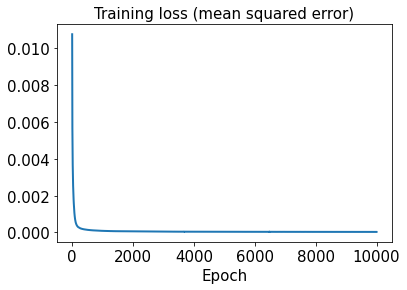

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

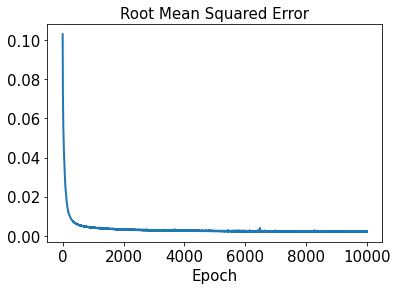

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

37/37 [==============================] - 0s 1ms/step - loss: 2.7172e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0003779862


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0011715501


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

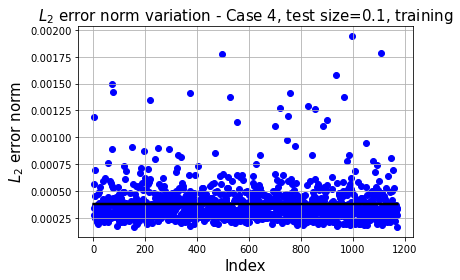

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

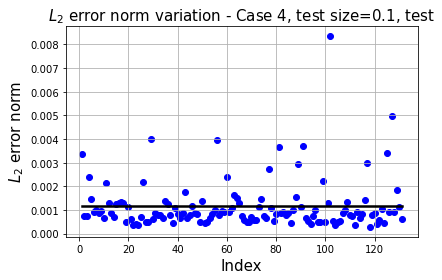

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

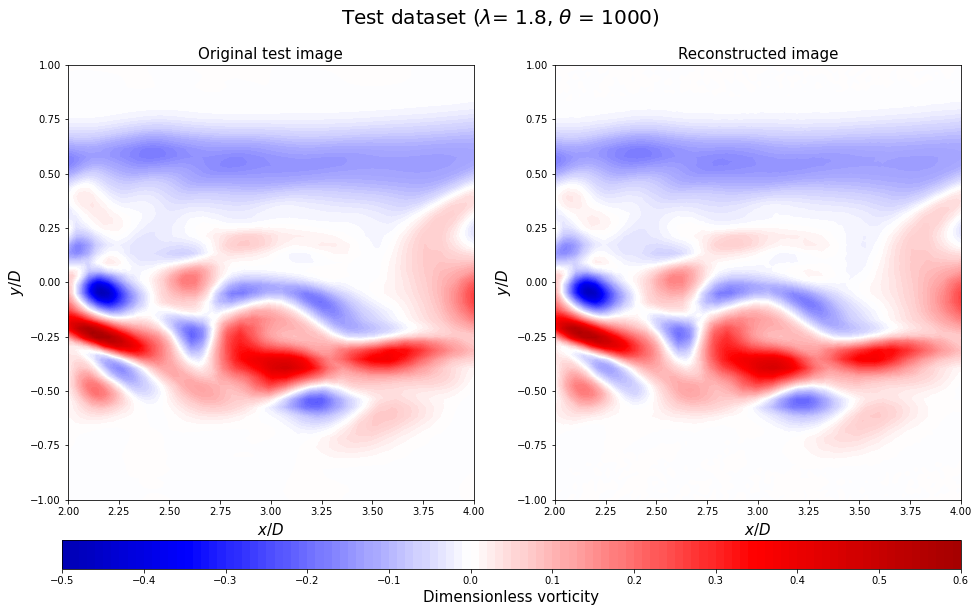

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

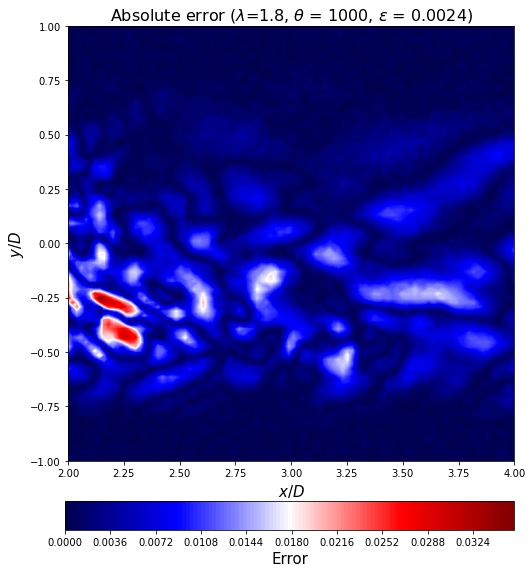

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()